Four equations for the rate of changes of the four species, E, S, ES, and P
1.(d[P])/dt=k3*[ES]
2.(d[ES])/dt=k1[E][S]-k2[ES]-k3[ES]
3.(d[S])/dt=-k1[E][S] + k2[ES]
4.(d[E])/dt=-k1[E][S] + K2 [ES] +k3[P]


t(min)	[E] (µM))	[S] (µM)	[ES] (µM)	[P] (µM)
0.00	1.0000	10.000000	0.000000	0.0000
0.60	1.0000	10.000000	0.000000	0.0000
1.20	1.0000	10.000000	0.000000	0.0000
1.80	1.0000	10.000000	0.000000	0.0000
2.40	1.0000	10.000000	0.000000	0.0000
3.00	1.0000	10.000000	0.000000	0.0000


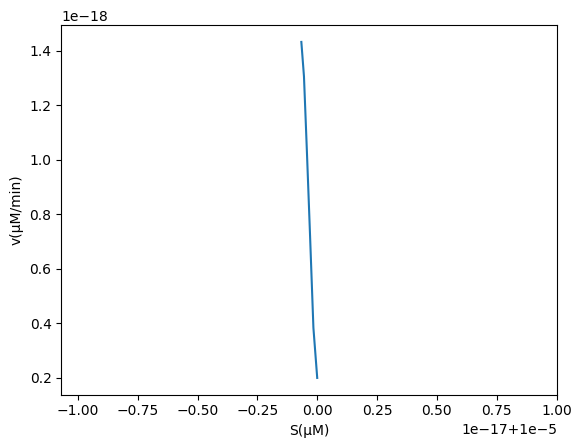

In [8]:
import numpy as np
#NumPy is needed to create and manipulate arrays


#To use the fourth-order Runge-Kutta method, 
# we need to define a function that computes the derivatives of the variables at each time step.
# t is the time variable, y is an array containing the concentrations of [E, S, ES, P] at time t, 
# and dydt is an array containing the corresponding time derivatives.
def f(t,y):
    k1 = 100/1e6/60
    k2=600/60
    k3=150/60


# np.zeros is a function to perform vectorized calculations
# np.zeros(4) creates a NumPy array of length 4, with all elements initialized to 0
#The dydt variable represents the rate of change of the concentrations of the four species ([E], [S], [ES], 
# and [P]) with respect to time, at a given time point t and given concentrations y of these species.


#The next four lines update the values of dydt according to a system of differential equations,
#which are specific to the reaction being modeled.

#dydt[0] represents the time derivative of [E], dydt[1] represents the time derivative of [S], 
# dydt[2] represents the time derivative of [ES], and dydt[3] represents the time derivative of [P]

#The negative sign in front of k1 indicates that the concentration
# of [E] and [S] decrease over time as they are consumed in the formation of the ES complex.
#k2*y[2] represents the rate at which ES complex is consumed due to its conversion to product P, 
# and -k3*y[2] represents the rate at which ES complex is consumed due to its conversion to E and P.

#use the return statement to return the dydt array from the function, which is subsequently used 
# in the fourth-order Runge-Kutta method to approximate the concentrations of [E], [S], [ES], and 
# [P] at various time points
    dydt=np.zeros(4)
    dydt[0]=-k1*y[0]*y[1]+k2*y[2]+k3*y[2]
    dydt[1]=-k1*y[0]*y[1]+k2*y[2]
    dydt[2]=k1*y[0]*y[1]-k2*y[2]-k3*y[2]
    dydt[3]=k3*y[2]
    return dydt


# Define the time range and step size.
# t0, tf, and h, which represent the starting time, ending time, and time step size
t0=0
tf=5
h=0.01
#tf-t0 gives the total simulation time, and h is the time step size. The expression (tf-t0/h) 
# calculates the number of steps that would be required to reach the final time tf with a step size of h.

#The int() function rounds this value down to the nearest integer. 
# Adding 1 to this value ensures that we include the initial time step.

#Thus, n represents the total number of time steps that will be used in the simulation. 
# This value is used to initialize the t and y arrays, 
#which will store the concentrations of [E], [S], [ES], and [P] at each time point.
n=int((tf-t0/h))+1

#t=np.zeros(n) and y=np.zeros((n,4)) is to initialize two arrays to store the time 
# and the concentration values of each chemical species at different time points during the simulation
# y=np.zeros((n,4)) is to creates a two-dimensional array of size n x 4
# Each row will represent concentration value of each species 
# the first column of the array y[:,0] - store the concentration of substrate [S]
# the second column of the array y[:,1] - store the concentration of enzyme [E]
# the third column y[:,2] - store the concentration of enzyme-substrate complex [ES]
# the fourth column y[:,3] -store the concentration of product [P]
t=np.zeros(n)
y=np.zeros((n,4))

# y[0,0] sets the initial concentration of [E] at time 0
# initial concentration of [E] is set to be 1 µM (i.e., 1e-6 M),given
# y[0,1] sets the initial concentration of [S] at time 0
# initial concentration of [S] to 10 µM (i.e., 10e-6 M),given 
y[0,0]=1e-6
y[0,1]=10e-6

#This code is implementing the fourth-order Runge-Kutta method
#  to numerically solve a system of differential equations.

#In the loop, k1 is computed by evaluating the function f (which represents
# the differential equations) at the current time t[i] and concentrations y[i].
# k2 is computed by evaluating f at t[i] + h/2 and y[i] + h/2*k1
#These four k values are then used to update the concentrations
# y and the time t using the fourth-order Runge-Kutta method formula.
#Calculate the slopes k1 for each equation at time t0.
#Calculate the slopes k2 for each equation at time t0 + h/2, where h is the time step size.
#Calculate the slopes k3 for each equation at time t0 + h/2.
#Calculate the slopes k4 for each equation at time t0 + h.

for i in range(n-1):
    k1 = f(t[i],y[i])
    k2 = f(t[i]+h/2,y[i]+h/2*k1)
    k3=f(t[i]+h/2,y[i]+h/2*k2)
    k4=f(t[i]+h,y[i]+h*k3)
  
    
#the average of the four slopes k1, k2, k3, and k4 is calculated using a weighted average
#This weighted average is then multiplied by h (the time step) 
# and added to the value of y at the i-th time step to obtain the value of y at the i+1-th time step
    y[i+1]=y[i]+h/6*(k1+2*k2+2*k3+k4)
#t[i+1]=t[i]+h updates the time at the next time step. Here, h is the step size, which determines the 
# size of the time interval between successive time steps. 
# Therefore, t[i+1] represents the time at the next time step, which is simply the current 
# time t[i] plus the step size h. This is repeated for each time step until the end time is reached.
    t[i+1]=t[i]+h

#This line of code prints a header for the table of results that will be printed in the following loop.
print("t(min)\t[E] (µM))\t[S] (µM)\t[ES] (µM)\t[P] (µM)")

#This code is printing the values of time (in minutes), 
# concentrations of different substances (in µM) at each time step during the simulation
for i in range(n):
    print ("{:.2f}\t{:.4f}\t{:4f}\t{:4f}\t{:.4f}".format(t[i]*60,y[i,0]*1e6,y[i,1]*1e6,y[i,2]*1e6,y[i,3]*1e6))

#Question : calculate the velocity as the rate of change of the product Plot the velocity V as a function of the substrate concentration S
#to create a plot of the velocity of the enzymatic reaction as a function of the substrate concentration
#The pyplot module from matplotlib is needed for creating visualizations in Python.

import matplotlib.pyplot as plt


#np.gradient()is used to calculate the derivative of the product concentration array with respect to time, 
# thus obtaining the velocity of the reaction at each time point
#y[:,3] is the concentration of the product P at each time point
# y[:,3],t--> means to select all rows in the fourth column of the array y, 
# while t represents the time points 
#y[:,3] represents the concentration of the product P, and t represents time. 
#Therefore, v represents the velocity or rate of change of the product P with respect to time
v=np.gradient (y[:,3],t)

#The plt.plot()function takes one or more arrays of data and plots them on a graph. 
# By default, it plots a line chart
#plt.plot(y[:,1],v) is to create a  plot of v against y[:,1]-->y-axis
#y[:,1] represents the concentration of the substrate S-->x-axis
#the plot will show how the velocity changes with the changes in substrate concentration 
plt.plot(y[:,1],v)
#plt.xlabel('S(µM)') is to set the label of the x-axis in a plot. 
# In this case, the label is set to 'S(µM)', 
# which means the x-axis represents the concentration of the substrate in micromoles (µM).
plt.xlabel('S(µM)')
#plt.ylabel('v((µM)/min') is to set the label of the y-axis in a plot.
# adding a label "v(µM/min)" to the y-axis of the plot 
plt.ylabel('v(µM/min)')
#to display the plot generated by the plt.plot() function
plt.show()

# The plot was generated below 
# This suggestes velocity is negatively correlated with the concentration of substrate, 
# as the concentration of substrate increases, the rate of the reaction slows down

References

10.2: The Equations of Enzyme Kinetics. (2015, December 26). Chemistry LibreTexts. https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_for_the_Biosciences_(Chang)/10%3A_Enzyme_Kinetics/10.02%3A_The_Equations_of_Enzyme_Kinetics

OpenAI. (2021, September 10). Chat with ChatGPT about artificial intelligence [Online conversation]. OpenAI. https://openai.com/